In [1]:
import torch
import torch_geometric
import numpy as np
from torch_geometric.data import Data
from typing import FrozenSet
from itertools import combinations
import networkx as nx

In [74]:
Edge = FrozenSet[int]

def generate_undirected_graph(edges: set[Edge]) -> list[list[int]]:
    """
    @param edges

    @return ensure the edges are doubled for an undirected graph
    """
    return [[x, y] for x, y in edges] + [[y, x] for x, y in edges]

def generate_random_edges(verts: int, num_rand_edges: int) -> tuple[set[Edge], set[FrozenSet[int]]]:
    """
    Generates a random graph with (at least one) Hamiltonian Path and an arbitrary number of vertices

    @param verts:
        an integer indicating the number of vertices in this graph. Note the graph will be connected
        via its Hamiltonian path

    @param num_rand_edges:
        an integer indicating the number of random edges to create, in addition to the edges used
        to construct a Hamiltonian path

    @return:

    """

    path_seq = np.random.permutation(verts)
    path_edges = np.lib.stride_tricks.sliding_window_view(path_seq, 2)
    path_edges_set = set(map(frozenset, path_edges))

    possible_edges = np.array(list(combinations(path_seq, 2)))
    random_edge_indices = np.random.choice(len(list(combinations(path_seq, 2))), size=num_rand_edges)

    random_edges = set(map(frozenset, possible_edges[random_edge_indices, :]))

    return path_edges, path_edges_set.union(random_edges)

def generate_hampath_graph(verts: int, num_rand_edges) -> Data:
    vertices = torch.tensor([[x] for x in range(verts)])
    _, all_edges = generate_random_edges(verts, num_rand_edges)
    edges_transposed = torch.tensor(np.array(list(map(list, generate_undirected_graph(all_edges)))))
    data = Data(x=vertices, edge_index=edges_transposed.t().contiguous())
    assert data.is_undirected()
    return data

# Boring sample graph

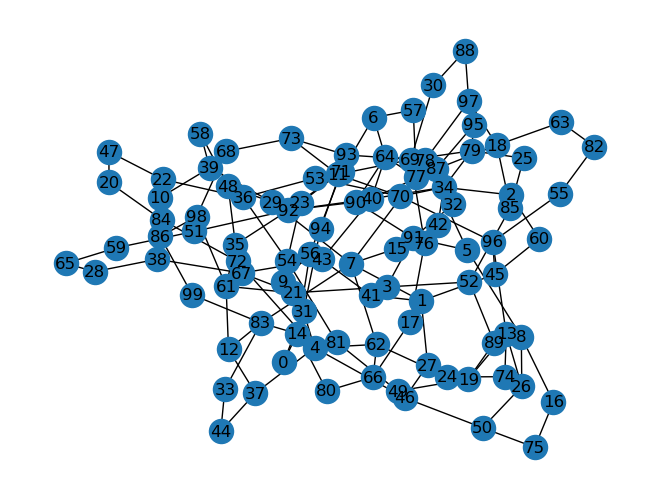

In [116]:
NUM_RAND_EDGES = 50
g = torch_geometric.utils.to_networkx(generate_hampath_graph(100, NUM_RAND_EDGES), to_undirected=True)
nx.draw(g, with_labels = True)